In [1]:
import numpy as np

In [2]:
def sinc(x):
    if x == 0.0:
        return 1.0
    else:
        return np.sin(x) / x

In [3]:
def createLPF(fe, delta):
    """ローパスフィルタを設計する関数
    fe: エッジ周波数
    delta: 遷移帯域幅
    遷移帯域幅を満たすフィルタ係数の数を計算
    N+1が奇数になるように調整が必要
    """

    # 臨海帯域幅から必要なサンプル数(フィルタ係数)を算出
    N = round(3.1 / delta) - 1.
    # N+1を奇数にする
    if (N + 1) % 2 == 0:
        N += 1
    N = int(N)

    # derived filter coefficient
    b = []
    for i in range(-int(N/2), int(N/2)+1):
        b.append(2.0 * fe * sinc(2.0 * np.pi * fe * i))

    # ハニング窓関数をかける(窓関数法)
    hanningWindow = np.hanning(N + 1)
    for i in range(len(b)):
        b[i] *= hanningWindow[i]

    return b

In [4]:
def fir(x, b):
    """FIR filtering
    x: in signal
    b: filter coefficient
    """

    y = [0.0] * len(x)
    N = len(b) - 1
    for n in range(len(x)):
        for i in range(N + 1):
            if n - i >= 0:
                y[n] += b[i] * x[n - i]

    return y

## Create White Noise

In [5]:
import numpy as np
from scipy.signal import firwin, lfilter
import matplotlib.pyplot as plt

stop = 10
Srate = 44100
x1=np.linspace(0, stop, Srate*stop)
A=0.5
y1 = np.random.rand(Srate * stop)-A

plt.plot(x1, y1)
plt.show();

<Figure size 640x480 with 1 Axes>

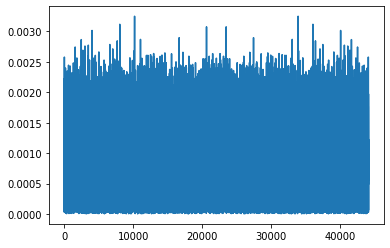

In [6]:
f  = np.linspace(1/float(stop), 44100, Srate * stop)
y11 = np.fft.fft(y1)/float(Srate * stop /2)
plt.plot(f, np.abs(y11))
plt.show();

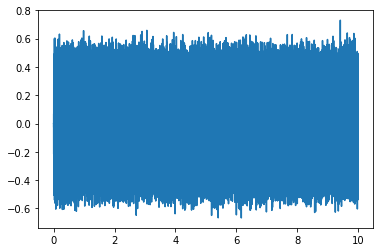

In [7]:
fs = Srate
# 正規化したエッジ周波数
fe = 10000.0 / fs
# 正規化した遷移帯域幅
delta = 1000.0 / fs

# LPFを設計
b = createLPF(fe, delta)
y = fir(y1, b)
plt.plot(x1, y)

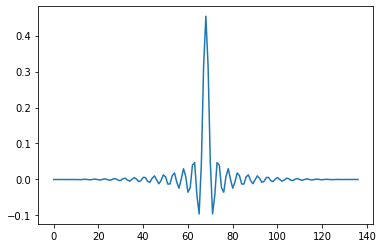

In [8]:
plt.plot(b)

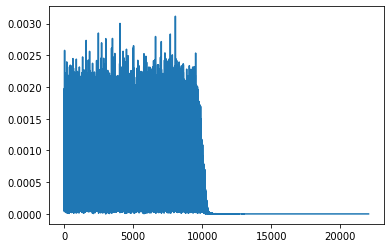

In [9]:
y = np.fft.rfft(y)/float(Srate * stop /2)
plt.plot(f[:int(len(f)/2)+1], np.abs(y))
plt.show();